[View in Colaboratory](https://colab.research.google.com/github/proishan11/Deep-Learning/blob/master/catsAndDogs.ipynb)

In [15]:
'''download data to colab virtual machine'''
# !wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
# !unzip kagglecatsanddogs_3367a.zip

# !pwd
# !ls

/content
adc.json  kagglecatsanddogs_3367a.zip  sample_data


In [0]:
from google.colab import files
!pip install PyDrive

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
'''Authenticate user to use google drive'''

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
'''upload file to drive'''

# upload = drive.CreateFile({'title': 'KaggleCatsAndDogs.zip'})
# upload.SetContentFile('./kagglecatsanddogs_3367a.zip')
# upload.Upload()
# print('Uploaded file with ID {}'.format(upload.get('id')))

In [0]:
'''Download data from drive to colab machine'''

'''from shareable link of file on google drive'''
DataID = '1xEwavyunqwvug-f_XjuKCFK9TZ7tj707'

download = drive.CreateFile({'id': '1xEwavyunqwvug-f_XjuKCFK9TZ7tj707'})

'''name you want to save on machine'''
download.GetContentFile('KaggleCatsAndDogs.zip')

# print('Downloaded content "{}"'.format(download.GetContentString()))




In [0]:
!unzip KaggleCatsAndDogs.zip
!ls

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import os

import cv2

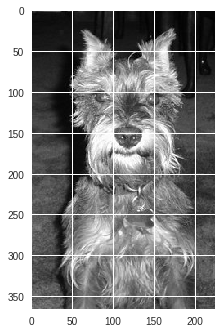

In [19]:
DATADIR = "./PetImages"

'''
  folder of classes. Images of dogs are in ./PetImages/Dog and cats in
  ./PetImages/Cat
'''

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    '''
      GrayScale because RGB is 3 dimensional i.e 3 times the size of GRAYSCALE
      Also color is not the differentiating factor b/w dogs and cats
    '''
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break
    
    

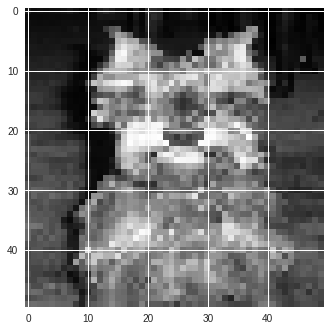

In [20]:
# will feed a 50x50 size image
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:
'''
  Preparing training data. [ [x1, label], [x2, label] ... ] 
  Labels: 0 for dog and 1 for cat
'''

training_data = []

def create_training_data():
  for category in CATEGORIES:
    
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

In [0]:
create_training_data()



In [23]:
print(len(training_data))

24946


In [0]:
import random

'''
  If we feed dog first and then cat. Neural network will first learn to classify
  dogs only and then cat images will be fed. It will not learn well. So shuffle
  the data before feeding
'''

random.shuffle(training_data)

In [0]:
for sample in training_data:
  print(sample[1])

In [0]:
X = []
Y = []

for features, label in training_data:
  X.append(features)
  Y.append(label)
  
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# print(X[0][1])

In [80]:
# !pip install --ignore-installed --upgrade tensorflow

#! git clone https://github.com/fchollet/keras.git

import keras
print(keras.__version__)

2.1.6


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X = X/255.0
# print(X.shape[1:])

model = Sequential()

model.add( Conv2D(64, (3,3), input_shape = X.shape[1:]) )
model.add( Activation("relu") )
model.add( MaxPooling2D(pool_size = (2,2)) )

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss="binary_crossentropy", 
              optimizer="adam",
              metrics = ['accuracy'])

# validation split means out of training data (0.1 means 10%)
model.fit(X,Y, batch_size=32, epochs=10, validation_split=0.1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 11s 488us/step - loss: 0.6360 - acc: 0.6346 - val_loss: 0.6090 - val_acc: 0.6806
Epoch 2/10
22451/22451 [==============================] - 10s 455us/step - loss: 0.5572 - acc: 0.7178 - val_loss: 0.5447 - val_acc: 0.7283
Epoch 3/10
22451/22451 [==============================] - 10s 451us/step - loss: 0.5158 - acc: 0.7500 - val_loss: 0.5087 - val_acc: 0.7511
Epoch 4/10
22451/22451 [==============================] - 10s 449us/step - loss: 0.4893 - acc: 0.7682 - val_loss: 0.5278 - val_acc: 0.7435
Epoch 5/10
22451/22451 [==============================] - 10s 446us/step - loss: 0.4642 - acc: 0.7836 - val_loss: 0.4841 - val_acc: 0.7723
Epoch 6/10
22451/22451 [==============================] - 10s 441us/step - loss: 0.4391 - acc: 0.7985 - val_loss: 0.4973 - val_acc: 0.7619
Epoch 7/10
22451/22451 [==============================] - 10s 447us/step - loss: 0.4212 - acc: 0.8066 - val_loss: 0.4

In [0]:
model.save('CatsAndDogsClassifier.model')



0


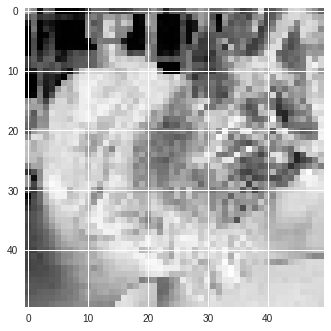

In [43]:
new_model = tf.keras.models.load_model('CatsAndDogsClassifier.model')
predictions = new_model.predict(X)

print(np.argmax(predictions[0]))

plt.imshow(np.array(X[1]).reshape(IMG_SIZE, IMG_SIZE))
plt.show()